In [68]:
import pandas as pd
peak_bed_path="/oak/stanford/groups/akundaje/projects/chrombpnet/model_inputs/ENCODE_ATAC_downloads/IMR90/idr1.bed.gz"


In [96]:
peaks_in = pd.read_csv(peak_bed_path, sep="\t", header=None)
peaks_in["start"] = peaks_in[1]+peaks_in[9]-50
peaks_in["end"] = peaks_in[1]+peaks_in[9]+50

peaks_in["index"] = peaks_in[0]+peaks_in["start"].astype(str)+peaks_in["end"].astype(str)

peaks_in["rindex"] = peaks_in[0]+peaks_in[1].astype(str)+peaks_in[2].astype(str)+peaks_in[9].astype(str)


In [70]:
datatt = pd.read_csv("/oak/stanford/groups/akundaje/projects/chrombpnet/model_inputs/ENCODE_ATAC_downloads/IMR90/cell_type_idr_specficity.bed", sep="\t", header=None)
datatt["index"] = datatt[0]+datatt[1].astype(str)+datatt[2].astype(str)



In [71]:
datatt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,index
0,chr1,16613549,16613649,.,1000,.,21.84548,1935.95679,1929.76306,1015,H1ESC,1,chr11661354916613649
1,chr1,16613549,16613649,.,1000,.,21.84548,1935.95679,1929.76306,1015,GM12878,1,chr11661354916613649
2,chr1,16613549,16613649,.,1000,.,21.84548,1935.95679,1929.76306,1015,K562,1,chr11661354916613649
3,chr1,16613549,16613649,.,1000,.,21.84548,1935.95679,1929.76306,1015,HEPG2,1,chr11661354916613649
4,chr1,16913954,16914054,.,1000,.,22.25548,1745.11194,1738.98975,342,H1ESC,1,chr11691395416914054


In [72]:
datatt["contributing"] = datatt[11]>0

In [73]:
final = datatt.groupby(["index"])["contributing"].agg("sum")
final.head()

index
chr10100006410100006510    1
chr10100009633100009733    4
chr10100009933100010033    4
chr10100010227100010327    1
chr10100010508100010608    0
Name: contributing, dtype: int64

In [74]:
#final["chr10100006279100006805181"]

In [75]:
peaks_index_to_density = []
for i,r in peaks_in.iterrows():
    peaks_index_to_density.append(final[r["index"]])

In [76]:
import numpy as np
sum(np.array(peaks_index_to_density)==4)

31814

In [77]:
sum(np.array(peaks_index_to_density)==0)

77251

In [78]:
sum(np.array(peaks_index_to_density)==1)

28369

In [79]:
sum(np.array(peaks_index_to_density)==2)

18003

In [80]:
per_peak_density = pd.read_csv("imr90_per_peak_density_temp.csv", header=None)

In [81]:
per_peak_density_df = per_peak_density.sort_values(0).reset_index(drop=True)

In [82]:
#per_peak_density_df

In [83]:
#len(peaks_index_to_density)

In [84]:
specficity = []
for i,r in per_peak_density_df.iterrows():
    specficity.append(peaks_index_to_density[r[0]])
    

In [85]:
per_peak_density_df["specficity"] = specficity
per_peak_density_df  = per_peak_density_df.rename({0:"pi", 1:"density"}, axis='columns')

In [86]:
per_peak_density_df.head()
per_peak_density_df.loc[per_peak_density_df["specficity"]==1,"specficity"] = 4
per_peak_density_df.loc[per_peak_density_df["specficity"]==3,"specficity"] = 4
per_peak_density_df.loc[per_peak_density_df["specficity"]==2,"specficity"] = 4

<AxesSubplot:xlabel='specficity', ylabel='density'>

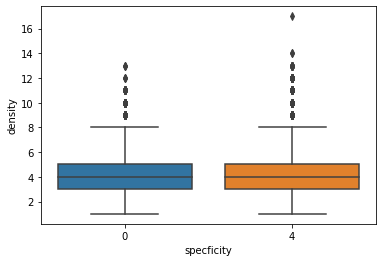

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=per_peak_density_df, x="specficity", y="density")


<AxesSubplot:xlabel='density', ylabel='Proportion'>

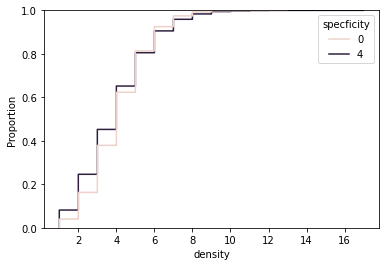

In [88]:
sns.ecdfplot(data=per_peak_density_df, x="density", hue="specficity")


In [89]:
per_peak_density_df

,pi,density,specficity
0,0,5,4
1,1,5,4
2,2,6,4
3,3,2,4
4,4,4,4
...,...,...,...
172631,174975,5,0
172632,174976,4,0
172633,174977,2,4
172634,174978,3,0


In [182]:
intersect_bed = pd.read_csv("/oak/stanford/groups/akundaje/projects/chrombpnet/model_inputs/ENCODE_ATAC_downloads/IMR90/ccre_intersect.bed", sep="\t", header=None)

print(intersect_bed.shape)


(444292, 22)


In [183]:
print(intersect_bed.head())

     0         1         2  3     4  5         6           7           8   \
0  chr1  16612584  16614029  .  1000  .  21.84548  1935.95679  1929.76306   
1  chr1  16612584  16614029  .  1000  .  21.84548  1935.95679  1929.76306   
2  chr1  16612584  16614029  .  1000  .  21.84548  1935.95679  1929.76306   
3  chr1  16612584  16614029  .  1000  .  21.84548  1935.95679  1929.76306   
4  chr1  16612584  16614029  .  1000  .  21.84548  1935.95679  1929.76306   

     9   ...        12            13  14 15        16        17           18  \
0  1015  ...  16612872  EH38E2789636   0  .  16612522  16612872  255,170,170   
1  1015  ...  16613098  EH38E2789637   0  .  16612927  16613098    255,167,0   
2  1015  ...  16613748  EH38E3955878   0  .  16613398  16613748      255,0,0   
3  1015  ...  16613932  EH38E2789640   0  .  16613756  16613932    255,167,0   
4  1015  ...  16613385  EH38E3955877   0  .  16613114  16613385    255,167,0   

           19                            20   21  
0  CA

In [184]:
intersect_bed["rindex"] = intersect_bed[0]+intersect_bed[1].astype(str)+intersect_bed[2].astype(str)+intersect_bed[9].astype(str)


In [185]:
intersect_bed["pels"] = intersect_bed[19]=="PLS"
intersect_bed["dels"] = intersect_bed[19]=="dELS"

In [186]:
final_pels = intersect_bed.groupby(["rindex"])["pels"].agg("sum")
final_dels = intersect_bed.groupby(["rindex"])["dels"].agg("sum")


In [187]:
final_pels.shape

(174980,)

In [188]:
is_pels = []
for i,r in peaks_in.iterrows():
    is_pels.append((final_pels[r["rindex"]]>=1)) 

In [189]:
is_dels = []
for i,r in peaks_in.iterrows():
    is_dels.append((final_dels[r["rindex"]]>=1)) 

In [190]:
tt_is_pels = []
for i,r in per_peak_density_df.iterrows():
    tt_is_pels.append(is_pels[r["pi"]])

tt_is_dels = []
for i,r in per_peak_density_df.iterrows():
    tt_is_dels.append(is_dels[r["pi"]])



In [191]:
per_peak_density_df["is_pels"] = tt_is_pels
per_peak_density_df["is_dels"] = tt_is_dels
#per_peak_density_df.shape

In [192]:
per_peak_density_df

,pi,density,specficity,is_pels,is_dels
0,0,5,4,True,False
1,1,5,4,False,True
2,2,6,4,False,True
3,3,2,4,False,False
4,4,4,4,True,False
...,...,...,...,...,...
172631,174975,5,0,False,False
172632,174976,4,0,False,False
172633,174977,2,4,False,False
172634,174978,3,0,False,False


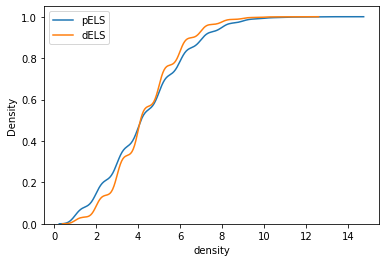

In [193]:

import seaborn as sns

sns.kdeplot(data = per_peak_density_df[per_peak_density_df["is_pels"]==True]["density"], cumulative = True, label = "pELS")
sns.kdeplot(data = per_peak_density_df[per_peak_density_df["is_dels"]==True]["density"], cumulative = True, label = "dELS")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


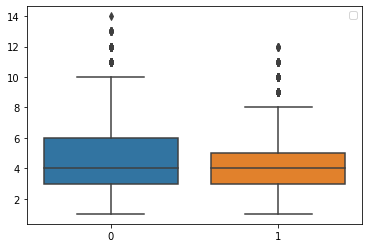

In [196]:
sns.boxplot(data = [per_peak_density_df[per_peak_density_df["is_pels"]==True]["density"], per_peak_density_df[per_peak_density_df["is_dels"]==True]["density"]])
plt.legend()
plt.show()